In [3]:
import os
os.getcwd()

path = '/Users/daylelee/Desktop/2024 DBB EXPERT/3_project'
os.chdir(path)
print(os.getcwd())

/Users/daylelee/Desktop/2024 DBB EXPERT/3_project


In [503]:
import pandas as pd
df1 = pd.read_excel('./data/DBB_21.2월 모집_장기/[DBB]유지율_로우데이터.xlsx')
#df2 = pd.read_excel('./data/DBB_21.2월 모집_장기/raw_2103모집(2102_2306)_해당.xlsx')
df = df1

In [505]:
# 데이터 전처리

# 1.계약의 보험시기와 보험종기간의 차이를 일 단위로 계산
df['보험기간_일'] = (pd.to_datetime(df['보험기간종료일자'], format='%Y%m%d') - pd.to_datetime(df['보험기간시작일자'], format='%Y%m%d')).dt.days
df['보험기간_월'] = (df['보험기간_일'] / 365).astype(int)

# 2.계약자성별코드 등 변수 3종 숫자형으로 변환
df['계약자성별코드']=df['계약자성별코드'].map({'1':0, '2':1})
df['계약자성별코드']=df['계약자성별코드'].fillna(0.5)
df = df[df['계약자성별코드'] != 0.5]  #계약자성별코드에서 0.5를 결측치로 간주하고 해당 행 제거
df['계약자성별코드'] = df['계약자성별코드'].astype(int)
#df.loc[:, '계약자성별코드'] = df['계약자성별코드'].astype(int)  # 원본 데이터프레임에 대해 명확하게 값을 할당

#df['만기구분코드']=df['만기구분코드'].map({'1':0, '2':1})
df['만기구분코드'] = df['만기구분코드'] - 1
#df.loc[:, '만기구분코드'] = df['만기구분코드'] - 1   # .loc[]를 사용하여 값을 명확하게 할당

#df['피보험자성별코드'] = df['피보험자성별코드'].map({'1':0, '2':1})
df['피보험자성별코드'] = df['피보험자성별코드'] - 1
#df.loc[:, '피보험자성별코드'] = df['피보험자성별코드'] - 1   # .loc[]를 사용하여 값을 명확하게 할당


# 3.주피보험자직업코드 범주형 변수 전처리
from sklearn.preprocessing import LabelEncoder

# Label Encoding 수행
encoder = LabelEncoder()
df['주피보험자직업코드_lab'] = encoder.fit_transform(df['주피보험자직업코드'])

# Target Encoding 수행
encoding_map = df.groupby('주피보험자직업코드')['불량여부'].mean()
df['주피보험자직업코드_tar'] = df['주피보험자직업코드'].map(encoding_map)

# Frequency Encoding 수행
frequency_map = df['주피보험자직업코드'].value_counts()
df['주피보험자직업코드_freq'] = df['주피보험자직업코드'].map(frequency_map)

/var/folders/6v/5vh7r_l96l76jz08z50fqz6c0000gp/T/ipykernel_62561/3094468496.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['계약자성별코드'] = df['계약자성별코드'].astype(int)
/var/folders/6v/5vh7r_l96l76jz08z50fqz6c0000gp/T/ipykernel_62561/3094468496.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['만기구분코드'] = df['만기구분코드'] - 1
/var/folders/6v/5vh7r_l96l76jz08z50fqz6c0000gp/T/ipykernel_62561/3094468496.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [509]:
# EDA 시행
print("* 대상 데이터 기준:\n장기보유계약명세_월 테이블\n1. 202408 마감월 기준\n2. 2022년도 보험가입\n3. 납입방법: 월납\n4. 30636 상품코드(GA전용 훼밀리플러스건강보험)\n5. 계약상태: 소멸, 철회, 취소 제외")
print("\n* 불량기준:\n- 납입회차 15회 이하인 경우, 불량여부를 1로 표기\n- 이외 불량여부 0으로 표기\n")
print("전체계약건수 :", len(set(df['증권번호'])),"\n15회차이전 해지계약건수 :", len(set(df[df['불량여부']==1]['증권번호'])),"\n")
print(df.dtypes)
print('\n')
print('수금방법코드 :',set(df['수금방법코드']))
print('계약상태코드 :',set(df['계약상태코드']))
print('계약상태세부코드 :',set(df['계약상태세부코드']))
print('만기구분코드 :',set(df['만기구분코드']))
print('PA계약여부 :',set(df['PA계약여부']))
print('PA가족계약여부 :',set(df['PA가족계약여부']))
print('PA본인계약여부 :',set(df['PA본인계약여부']))
print('계약자성별코드 :',set(df['계약자성별코드']))
print('승환계약여부 :',set(df['승환계약여부']))
print('주피보험자상해급수코드 :',set(df['주피보험자상해급수코드']))
print('피보험자성별코드 :',set(df['피보험자성별코드']))
print('개인단체구분코드 :',set(df['개인단체구분코드']))
print('불량여부 :',set(df['불량여부']))
print('\n')
print(df['피보험자성별코드'].value_counts(True))
print(df['계약자성별코드'].value_counts(True))
print(df['승환계약여부'].value_counts(True))
print(df['불량여부'].value_counts(True))

* 대상 데이터 기준:
장기보유계약명세_월 테이블
1. 202408 마감월 기준
2. 2022년도 보험가입
3. 납입방법: 월납
4. 30636 상품코드(GA전용 훼밀리플러스건강보험)
5. 계약상태: 소멸, 철회, 취소 제외

* 불량기준:
- 납입회차 15회 이하인 경우, 불량여부를 1로 표기
- 이외 불량여부 0으로 표기

전체계약건수 : 155027 
15회차이전 해지계약건수 : 22963 

증권번호                int64
보험기간시작일자            int64
보험기간종료일자            int64
계약상태코드              int64
계약상태일자              int64
계약상태세부코드            int64
계약상태세부일자            int64
수금자사원번호            object
수금방법코드              int64
만기년수                int64
만기구분코드              int64
최종납입회차              int64
최종납입년월              int64
PA계약여부              int64
PA가족계약여부            int64
PA본인계약여부            int64
계약자연령               int64
계약자성별코드             int64
승환계약대상해지총건수         int64
승환계약여부              int64
피보험자연령              int64
피보험자고객번호            int64
주피보험자상해급수코드         int64
주피보험자직업코드          object
피보험자성별코드            int64
개인단체구분코드            int64
납입년수                int64
모집자사원번호            object
불량여부                int64
보험기간_일              i

In [511]:
df['증권번호'].head(3)

0    320221814443
1    320222189228
2    320221873917
Name: 증권번호, dtype: int64

In [519]:
df[:20][['불량여부','계약상태코드','계약상태세부코드',
         #'피보험자성별코드','계약자성별코드',
        '보험기간시작일자','보험기간_일','만기년수','납입년수', '계약상태일자','계약상태세부일자','최종납입회차','최종납입년월',
                              '수금방법코드', '만기구분코드',
        #'PA계약여부', 'PA가족계약여부', 'PA본인계약여부', 
        #'계약자연령', '피보험자연령',
        '승환계약여부','승환계약대상해지총건수', 
        #'주피보험자상해급수코드', 
        #'주피보험자직업코드','주피보험자직업코드_lab','주피보험자직업코드_tar','주피보험자직업코드_freq'
        ]]

#['증권번호', '보험기간시작일자', '보험기간종료일자', '계약상태코드', '계약상태일자', '계약상태세부코드',
#       '계약상태세부일자', '수금자사원번호', '수금방법코드', '만기년수', '만기구분코드', '최종납입회차', '최종납입년월',
#       'PA계약여부', 'PA가족계약여부', 'PA본인계약여부', '계약자연령', '계약자성별코드', '승환계약대상해지총건수',
#       '승환계약여부', '피보험자연령', '피보험자고객번호', '주피보험자상해급수코드', '주피보험자직업코드', '피보험자성별코드',
#       '개인단체구분코드', '납입년수', '모집자사원번호', '불량여부']

,불량여부,계약상태코드,계약상태세부코드,보험기간시작일자,보험기간_일,만기년수,납입년수,계약상태일자,계약상태세부일자,최종납입회차,최종납입년월,수금방법코드,만기구분코드,승환계약여부,승환계약대상해지총건수
0,0,0,0,20220819,7305,20,20,20220819,20220819,25,202408,7,0,0,0
1,0,0,0,20221006,16071,44,20,20221006,20240524,23,202408,7,1,0,0
2,0,0,0,20220826,11688,32,20,20220826,20220826,25,202408,9,1,0,0
3,0,0,0,20220326,21915,60,30,20220326,20231128,30,202408,7,1,0,0
4,0,0,0,20220414,16071,44,20,20220414,20220414,29,202408,7,1,0,0
5,1,1,33,20220302,13514,37,20,20230401,20230401,11,202301,3,1,0,0
6,0,0,0,20221216,17532,48,20,20221216,20240903,21,202408,7,1,0,0
7,0,0,0,20220114,10957,30,20,20220114,20220114,32,202408,7,1,1,2
8,0,2,9,20221124,7305,20,20,20240703,20240703,20,202406,3,0,0,0
9,0,0,0,20220713,23011,63,20,20220713,20220713,26,202408,7,1,0,0


In [521]:
col1=['불량여부','피보험자성별코드','계약자성별코드',
      '보험기간시작일자','보험기간_일','최종납입회차','최종납입년월','납입년수',
                              '수금방법코드', '만기년수', '만기구분코드',
                              'PA계약여부', 'PA가족계약여부', 'PA본인계약여부', 
                              '계약자연령', '피보험자연령',
                              '승환계약여부','승환계약대상해지총건수', 
                              '주피보험자상해급수코드','주피보험자직업코드_lab','주피보험자직업코드_tar','주피보험자직업코드_freq']
corr_matrix = df[col1].corr()
print(corr_matrix['불량여부'])

불량여부              1.000000
피보험자성별코드         -0.025932
계약자성별코드          -0.034000
보험기간시작일자          0.012613
보험기간_일           -0.053214
최종납입회차           -0.832429
최종납입년월           -0.860296
납입년수              0.006388
수금방법코드           -0.392855
만기년수             -0.053213
만기구분코드           -0.050146
PA계약여부            0.042820
PA가족계약여부         -0.001111
PA본인계약여부          0.011311
계약자연령             0.027118
피보험자연령            0.034404
승환계약여부            0.035757
승환계약대상해지총건수       0.048693
주피보험자상해급수코드       0.063073
주피보험자직업코드_lab     0.039305
주피보험자직업코드_tar     0.124253
주피보험자직업코드_freq   -0.031001
Name: 불량여부, dtype: float64


In [311]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [523]:
# 특징과 레이블 분리

# test1
X = df[['수금방법코드', '만기년수', '만기구분코드',
    'PA계약여부', 'PA가족계약여부', 'PA본인계약여부', '계약자연령',
    '승환계약여부','승환계약대상해지총건수',
    '피보험자연령','피보험자성별코드','주피보험자상해급수코드',
    '납입년수']]

y = df['불량여부']

# test2
df_test = df[['불량여부','수금방법코드','주피보험자상해급수코드',
              '피보험자성별코드','계약자성별코드','보험기간시작일자','보험기간_일','납입년수',
              'PA계약여부', 'PA가족계약여부', 'PA본인계약여부', '계약자연령', '피보험자연령',
              '승환계약여부','승환계약대상해지총건수']]

df_one_hot = pd.get_dummies(df_test, columns=['수금방법코드'])
X_1 = df_one_hot.drop('불량여부', axis=1)
y_1 = df_one_hot['불량여부']

In [411]:
# test1 데이터를 학습용과 테스트용으로 분할 (70% 학습, 30% 테스트)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 77)

In [525]:
# test2 데이터를 학습용과 테스트용으로 분할 (70% 학습, 30% 테스트)

X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 77)

In [619]:
# 1.로지스틱 회귀(Logistic Regression)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

#테스트 데이터에 대한 예측 확률 계산
y_pred_proba = log_reg.predict_proba(X_test)

# 정확도 1
y_pred = log_reg.predict(X_test) # 테스트 데이터(특징 변수)에 대한 예측결과 반환
accuracy1 = accuracy_score(y_test, y_pred) # 실제값(y_test)과 예측결과(y_pred)를 비교

# 정확도 2
accuracy2 = log_reg.score(X_test, y_test) # 테스트에 대한 예측결과(X_test)와 실제값(y_test)을 비교

print(f"\n로지스틱 회귀 정확도1: {accuracy1*100:.2f}%")
print(f"로지스틱 회귀 정확도2: {accuracy2*100:.2f}%")
print(len(X_test),len(prob))
print("불량계약일 예측 확률", y_pred_proba[:,1])


로지스틱 회귀 정확도1: 85.27%
로지스틱 회귀 정확도2: 85.27%
46509 46509
불량계약일 예측 확률 [0.14561946 0.13738294 0.18126602 ... 0.12312747 0.13510415 0.12105555]


회귀 계수: [ 4.51626962e-09 -1.20819173e-09 -1.51501339e-09 -6.49836619e-08
 -2.65252842e-05  3.30404618e-09  7.70676147e-10  1.69999685e-12
  1.40127924e-10  2.44979298e-08  2.75399635e-08  1.08855752e-09
  2.41136566e-09  1.57726177e-08  2.07249449e-12 -1.51950558e-08
 -5.78573945e-10 -1.08406564e-12]
오즈 비율: [1.         1.         1.         0.99999994 0.99997348 1.
 1.         1.         1.         1.00000002 1.00000003 1.
 1.         1.00000002 1.         0.99999998 1.         1.        ]
정확도: 0.85
정밀도: 0.00

Confusion Matrix:
 [[TN       FP]
 [ FN      TP]]
Confusion Matrix:
 [[39658     0]
 [ 6851     0]]


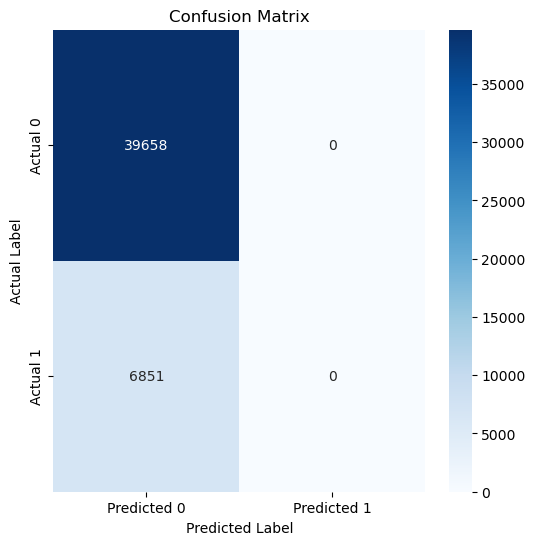

In [640]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred)

# 회귀 계수 확인
coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)

print("회귀 계수:", coefficients)
print("오즈 비율:", odds_ratios)

# 성능 지표 계산
accuracy = accuracy_score(y_test, log_reg.predict(X_test))
precision = precision_score(y_test, log_reg.predict(X_test),zero_division=0)
#recall = recall_score(y_test, log_reg.predict(X_test))
#f1 = f1_score(y_test, log_reg.predict(X_test))
#roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"정확도: {accuracy:.2f}")
print(f"정밀도: {precision:.2f}")
#print(f"재현율: {recall:.2f}")
#print(f"F1 점수: {f1:.2f}")
#print(f"ROC-AUC: {roc_auc:.2f}")

print("\nConfusion Matrix:\n [[TN       FP]\n [ FN      TP]]")
print("Confusion Matrix:\n", cm)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [531]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
# K-Fold Cross-validation
scores = cross_val_score(log_reg, X, y, cv=10) # 10-Fold 교차 검증

print("\n각 폴드의 정확도:\n", scores)
print(f"\n로지스틱 회귀에 대한 교차검증 평균 정확도: {scores.mean()*100:.2f}%")


각 폴드의 정확도:
 [0.85028704 0.85015803 0.85106108 0.85248017 0.85235116 0.85028704
 0.85151261 0.85189008 0.85201909 0.85034189]

로지스틱 회귀에 대한 교차검증 평균 정확도: 85.12%



테스트 정확도: 83.2%
정확도: 83.20
정밀도: 38.76
재현율: 24.24
F1 점수: 29.83

Confusion Matrix:
 [[TN       FP]
 [ FN      TP]]
Confusion Matrix:
 [[37034  2624]
 [ 5190  1661]]


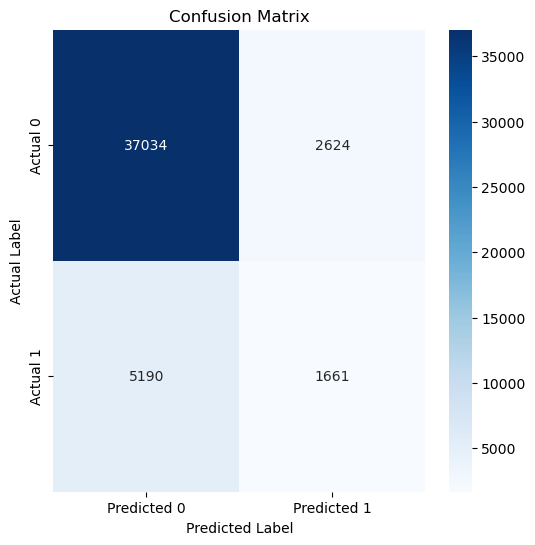

In [670]:
#랜덤 포레스트(Random Forest)(Bagging)

# 랜덤 포레스트 모델 생성 및 학습
clf = RandomForestClassifier(n_estimators = 100, random_state=77)  
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
print(f"\n테스트 정확도: {accuracy_score(y_test, y_pred)*100:.1f}%")

#테스트 데이터에 대한 예측 확률 계산
y_pred_proba = clf.predict_proba(X_test)

# 성능 지표 계산
accuracy = accuracy_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test),zero_division=0)
recall = recall_score(y_test, clf.predict(X_test))
f1 = f1_score(y_test, clf.predict(X_test))
#roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"정확도: {accuracy*100:.2f}")
print(f"정밀도: {precision*100:.2f}")
print(f"재현율: {recall*100:.2f}")
print(f"F1 점수: {f1*100:.2f}")
#print(f"ROC-AUC: {roc_auc:.2f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n [[TN       FP]\n [ FN      TP]]")
print("Confusion Matrix:\n", cm)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [617]:
1 - len(df[df['불량여부']==1])/len(set(df['증권번호']))

0.8518774149019204

In [672]:
print(f"{1661/(2624+1661)*100:.2f}")

38.76
